# Imports

In [4]:
import numpy as np
import panel as pn

from functools import partial
from PIL import Image
from pydub import AudioSegment
from matplotlib import pyplot as plt
import matplotlib.image as image
import array

rng = np.random.default_rng()

In [4]:
s = AudioSegment.from_file("Voice 240911_120121.m4a", "m4a")

In [5]:
s

In [6]:
n = np.array(s.get_array_of_samples())

In [9]:
textcolor = '#292929'
rc_params = {
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'axes.axisbelow': True,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.linewidth': 1.3,
    'grid.color': '#e5e5e5',
    'font.family': 'sans-serif',
    'font.sans-serif': ['Roboto Condensed', 'Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'lines.solid_capstyle': 'round',
    'axes.linewidth': 0,
    'xtick.major.size': 0,
    'ytick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.minor.size': 0,
    'text.color': 'black',
    'axes.titlesize': 26,
    'axes.titlelocation': 'left',
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,
    'axes.labelpad': 8,
    'axes.labelsize': 17,
    'axes.labelweight': 'bold',
    'xaxis.labellocation': 'right',
    'yaxis.labellocation': 'top',
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'legend.loc': 'center right',
    'legend.title_fontsize': 15,
    'legend.fontsize': 15,
    'legend.markerscale': 1.3,
    'figure.facecolor': '#ffffff',
    'axes.facecolor': '#ffffff',
    'savefig.facecolor': '#ffffff',
    'text.color': textcolor,
    'axes.labelcolor': textcolor,
    'xtick.color': textcolor,
    'ytick.color': textcolor,
}

colors = [
    "#00A499",
    "#43B02A",
    "#E4002B",
    "#FFB81C",
    "#0047BB",
    "#05C3DE",
    "#8246AF",
    "#FF8200",
]


In [10]:
noise = rng.normal(loc=0, scale=600, size=len(n))

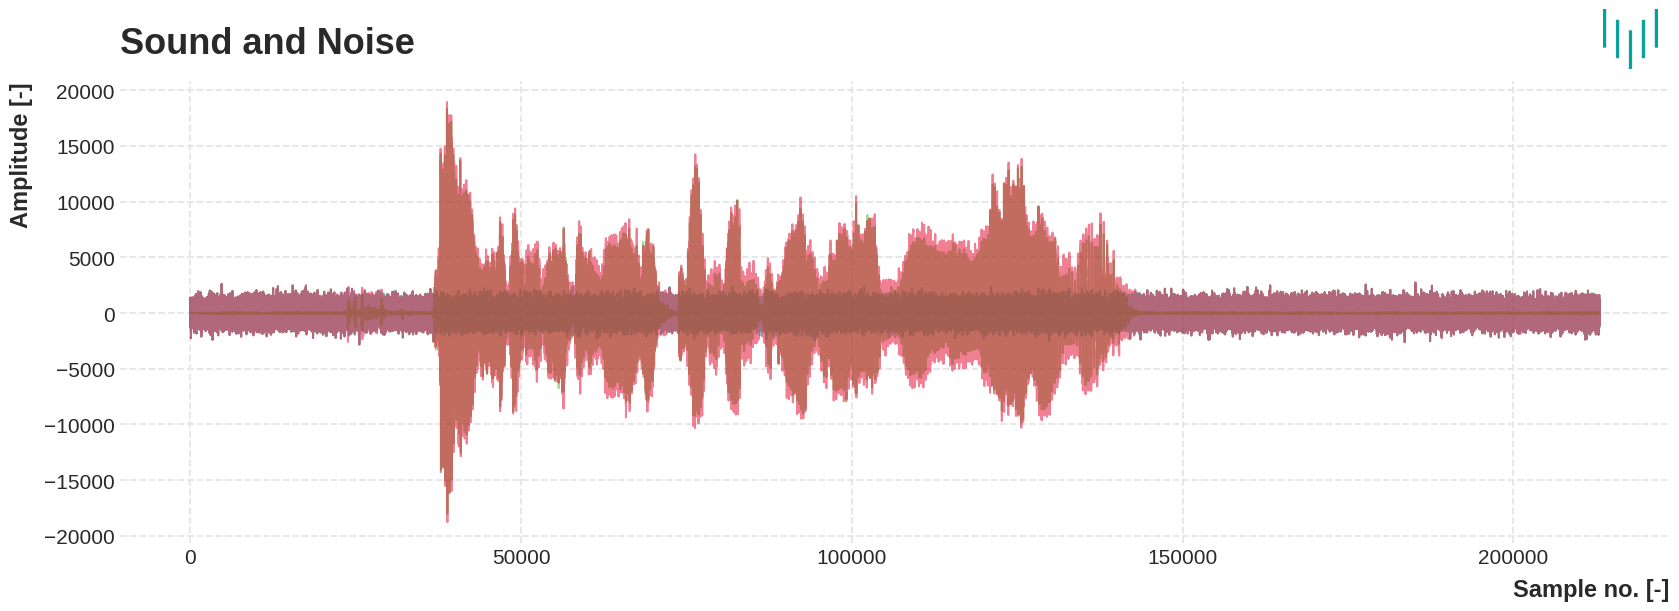

In [11]:

plt.rcParams.update(rc_params)
fig, ax = plt.subplots(figsize=(20,6))


im = image.imread("logo.png")

# put a new axes where you want the image to appear
# (x, y, width, height)
imax = fig.add_axes([.83, .9, 0.1, 0.1])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect="equal")

ax.plot(noise,alpha=.5, color=colors[0])
ax.plot(n,alpha=.5, color=colors[1])
ax.plot(n+noise, alpha=.5, color=colors[2])
ax.set_xlabel("Sample no. [-]")
ax.set_ylabel("Amplitude [-]")
ax.set_title("Sound and Noise")

plt.show()

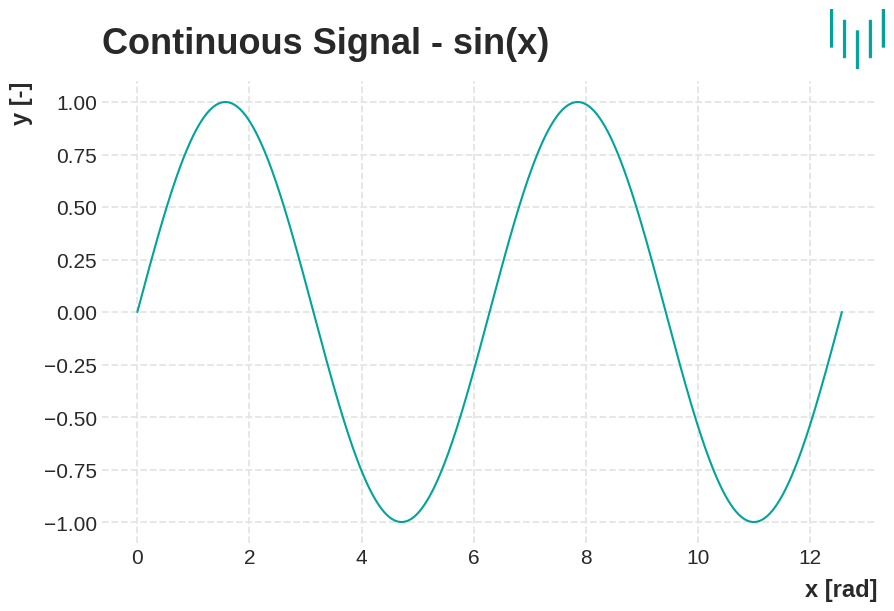

In [12]:
x = np.linspace(0, 4*np.pi, 1000)
y = np.sin(x)

plt.rcParams.update(rc_params)
fig, ax = plt.subplots(figsize=(10,6))


im = image.imread("logo.png")

# put a new axes where you want the image to appear
# (x, y, width, height)
imax = fig.add_axes([.83, .9, 0.1, 0.1])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect="equal")

ax.plot(x,y,alpha=1, color=colors[0])
ax.set_xlabel("x [rad]")
ax.set_ylabel("y [-]")
ax.set_title("Continuous Signal - sin(x)")

fig.savefig('continuous.png')
plt.show()

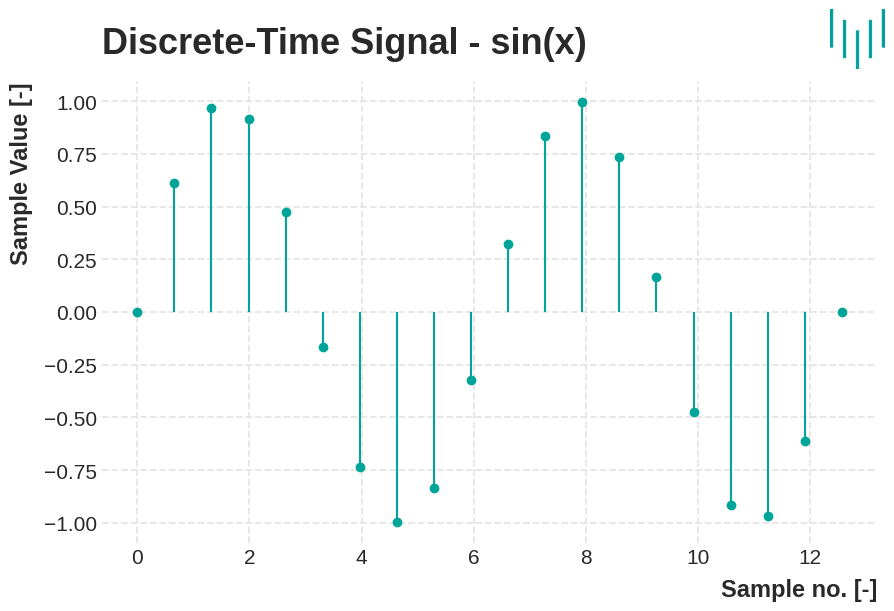

In [13]:
x = np.linspace(0, 4*np.pi, 20)
y = np.sin(x)

plt.rcParams.update(rc_params)
fig, ax = plt.subplots(figsize=(10,6))


im = image.imread("logo.png")

# put a new axes where you want the image to appear
# (x, y, width, height)
imax = fig.add_axes([.83, .9, 0.1, 0.1])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect="equal")

ax.stem(x,y, linefmt=colors[0], basefmt=' ')#color=colors[0])
ax.set_xlabel("Sample no. [-]")
ax.set_ylabel("Sample Value [-]")
ax.set_title("Discrete-Time Signal - sin(x)")

fig.savefig('discrete.png')
plt.show()

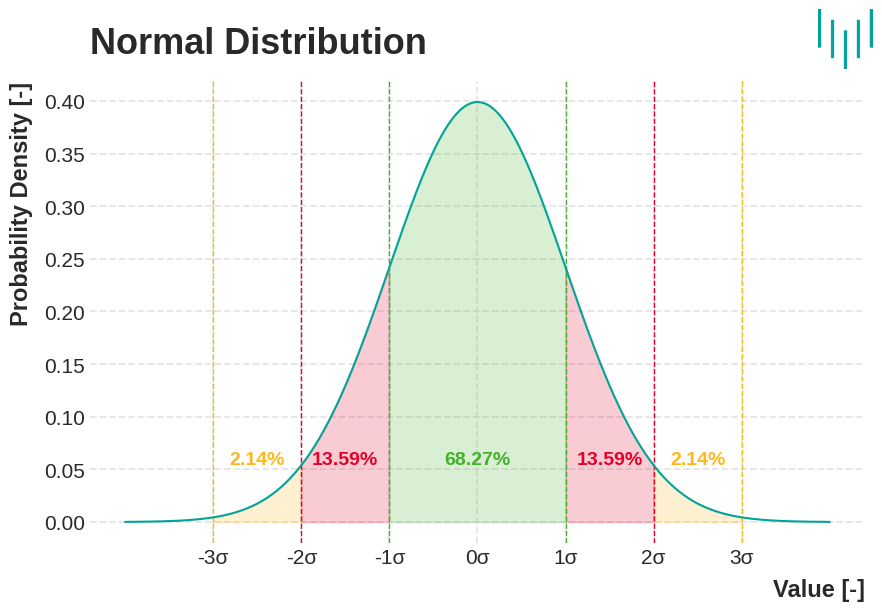

In [14]:
from scipy.stats import norm


plt.rcParams.update(rc_params)
fig, ax = plt.subplots(figsize=(10,6))

im = image.imread("logo.png")

# put a new axes where you want the image to appear
# (x, y, width, height)
imax = fig.add_axes([.83, .9, 0.1, 0.1])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect="equal")

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Generate the normal distribution curve
y = norm.pdf(x, mu, sigma)


# Define sigma intervals
sigmas = [1, 2, 3]

percentages = [68.27, 95.45, 99.73]
interval_percentages = [68.27, 13.59, 2.14]

# Plot vertical lines and annotate percentages
for i, sigma in enumerate(sigmas):

    # Fill between the sigma intervals
    if i == 0:
        ax.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color=colors[i+1], alpha=0.2)
        ax.text(mu, .055, f'{interval_percentages[i]}%', color=colors[i+1], ha='center', fontsize=14, fontweight='bold')
    else:
        ax.fill_between(x, y, where=(x >= mu + sigmas[i-1]) & (x <= mu + sigma), color=colors[i+1], alpha=0.2)
        ax.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu - sigmas[i-1]), color=colors[i+1], alpha=0.2)
        ax.text(mu + (sigmas[i-1] + sigma)/2, .055, f'{interval_percentages[i]}%', color=colors[i+1], ha='center',fontsize=14, fontweight='bold')
        ax.text(mu - (sigmas[i-1] + sigma)/2, .055, f'{interval_percentages[i]}%', color=colors[i+1], ha='center',fontsize=14, fontweight='bold')

    ax.axvline(mu + sigma, color=colors[i+1], linestyle='--', linewidth=1)
    ax.axvline(mu - sigma, color=colors[i+1], linestyle='--', linewidth=1)


# Plot the normal distribution
ax.plot(x, y, color=colors[0],label='Normal Distribution')

# Customize x-axis labels to show multiples of sigma
sigma_ticks = np.arange(-3, 4, 1)  # From -3σ to 3σ
ax.set_xticks(sigma_ticks, [f'{i}σ' for i in sigma_ticks])

# Add labels and title
ax.set_title('Normal Distribution')
ax.set_xlabel('Value [-]')
ax.set_ylabel('Probability Density [-]')
fig.savefig('normal.png')
plt.show()

In [16]:
s.frame_rate

48000

In [17]:
signal_with_noise = n + noise

In [19]:
sn = array.array(s.array_type, signal_with_noise.astype("int16"))

In [20]:
new_s = s._spawn(sn)

In [21]:
new_s

In [36]:
p = Image.open("../04/parrot.png")
p_gray = p.convert("L")
p_gray.save('parrot_gray.png')

In [5]:
p = Image.open("android.jpeg")
p_gray = p.convert("L")
p_gray.save('android_gray.png')

In [35]:
p_gray.save('android_gray.png')

In [9]:
# Convert the image to a NumPy array
image_array = np.array(p_gray)

mean = 0
variance = 0.01
sigma = variance ** 0.5
gaussian_noise = np.random.normal(mean, sigma, image_array.shape)

# Add the noise to the image
noisy_image_array = image_array + gaussian_noise * 255  # Scale noise to pixel range

# Clip the values to be in the valid range [0, 255]
noisy_image_array = np.clip(noisy_image_array, 0, 255)

# Convert the array back to an image
noisy_image = Image.fromarray(noisy_image_array.astype(np.uint8))

# Save or display the noisy image
noisy_image.save('noisy_image_var0_01.png')


In [10]:
image_array.shape

(1024, 1024)

In [14]:
mean = 0
variance = 0.1
sigma = variance ** 0.5
gaussian_noise = np.random.normal(mean, sigma, (image_array.shape[0]//16, image_array.shape[1]//16))

In [34]:
image_array = np.array(p_gray)
random_array = rng.random(image_array.shape)

percent = 0.1

mask = random_array < percent
print(mask.sum())


mean = 0
variance = 0.1
sigma = variance ** 0.5
gaussian_noise = np.random.normal(mean, sigma, image_array.shape) * 255  # Scale noise to pixel range

# Add the noise to the image
noisy_image_array = image_array.copy()
noisy_image_array[mask] = image_array[mask] + gaussian_noise[mask] 


# Clip the values to be in the valid range [0, 255]
noisy_image_array = np.clip(noisy_image_array, 0, 255)

# Convert the array back to an image
noisy_image = Image.fromarray(noisy_image_array.astype(np.uint8))

# Save or display the noisy image
noisy_image.save(f'noisy_image_var0_1_mask{percent}.png')


104879


np.float64(483.00850665266444)

In [15]:
gaussian_noise.shape

(64, 64)

In [ ]:
zeros = np.zeros(image_array.shape

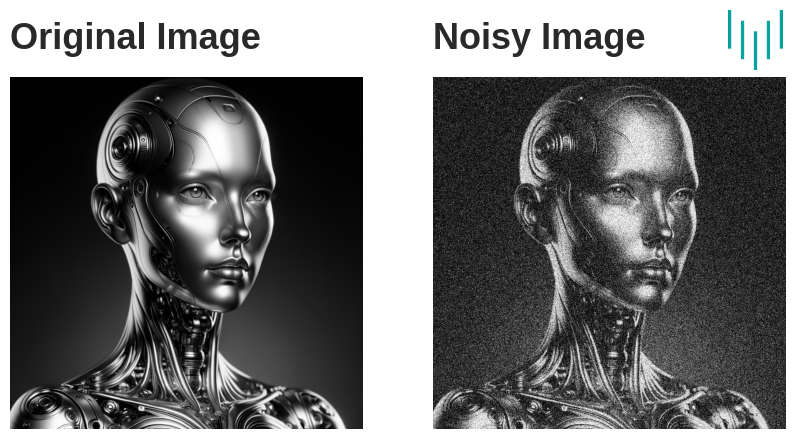

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
im = image.imread("logo.png")

# put a new axes where you want the image to appear
# (x, y, width, height)
imax = fig.add_axes([.82, .80, 0.1, 0.1])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect="equal")
axes[0].imshow(p_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

fig.savefig('noise.png')
# plt.tight_layout()
plt.show()